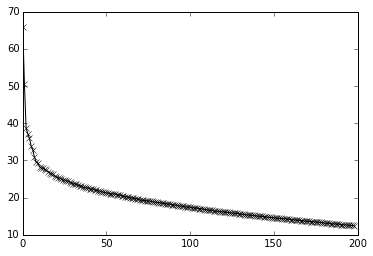

In [92]:
#execfile('Movies.py') # not sure this is getting the items correctly?

cols = max(rdata[:,1]) # another way of doing it...
rows = max(rdata[:,0])
vxm = sp.zeros((rows,cols))
for rating in rdata:
    vxm[rating[0]-1,rating[1]-1] = rating[2]
for i in range(vxm.shape[0]):
    row = vxm[i,:]
    row[row==0] = sp.mean(row[row!=0])
    vxm[i,:] = row

U,s,V = sp.linalg.svd(vxm, full_matrices = True )

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[1:200],'-kx')

In [113]:
U,s,V = sp.linalg.svd(vxm, full_matrices = True )
U = U[:,0:20]
V = V[0:20,:]
S = sp.diag(s)
S = S[:20,:20]
new_vxm = sp.dot(U, sp.dot(S,V))

# function to get movie names from ID
itemInfo = file('u.item','r').read().split('\n')
def getMovieName(i):
    return itemInfo[i].split('|')[1]
def idByTitle(t):
    for i in range(sp.shape(itemInfo)[0]):
        if itemInfo[i].split('|')[1]==t:
            return(i)        

In [101]:
# which movies are highest on dimension 1
topAlongDimension = sp.argsort(U[:,0])[::-1][0:20] # top 20 in dimension 0
print([getMovieName(i) for i in topAlongDimension])

# which movies are highest on dimension 5
topAlongDimension = sp.argsort(U[:,4])[::-1][0:20] # top 20 in dimension 0
print([getMovieName(i) for i in topAlongDimension])

# see a pattern? here's dimension 15
topAlongDimension = sp.argsort(U[:,14])[::-1][0:20] # top 20 in dimension 0
print([getMovieName(i) for i in topAlongDimension])

['Return of the Jedi (1983)', 'Mission: Impossible (1996)', 'Body Snatcher, The (1945)', 'Executive Decision (1996)', 'Prophecy, The (1995)', 'Circle of Friends (1995)', 'Akira (1988)', 'Ice Storm, The (1997)', 'So Dear to My Heart (1949)', 'Father of the Bride (1950)', 'L.A. Confidential (1997)', 'Barcelona (1994)', 'Howling, The (1981)', 'My Left Foot (1989)', 'M (1931)', "My Best Friend's Wedding (1997)", 'Top Gun (1986)', 'Kundun (1997)', 'Fried Green Tomatoes (1991)', 'Great White Hype, The (1996)']
['Mission: Impossible (1996)', "Ulee's Gold (1997)", 'True Crime (1995)', 'Spellbound (1945)', 'Evil Dead II (1987)', 'Muppet Treasure Island (1996)', 'Leaving Las Vegas (1995)', 'Bad Taste (1987)', 'City of Lost Children, The (1995)', "My Best Friend's Wedding (1997)", 'Man Who Knew Too Little, The (1997)', 'Kansas City (1996)', 'Mask, The (1994)', 'Absolute Power (1997)', 'I.Q. (1994)', 'As Good As It Gets (1997)', 'Deconstructing Harry (1997)', 'Soul Food (1997)', 'Citizen Ruth (199

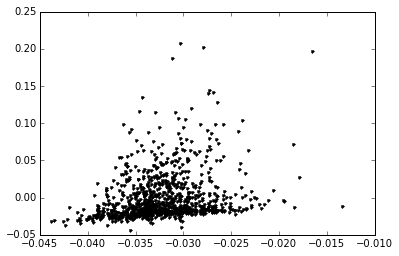

In [106]:
plt.plot(U[:,0],U[:,1],'.k') # does not seem to extract strong, separable clusters...

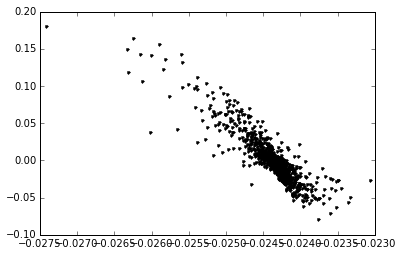

In [111]:
plt.plot(V[0,:],V[1,:],'.k') # plot the users by their scores along these new eigen components

In [122]:
# what about movies that we know should be close together in this space?
movie1 = idByTitle('Batman Forever (1995)')
movie2 = idByTitle('Batman Returns (1992)')
# cosine is often used to estimate the relationship between the items in the lower dimensionality:
print(sp.spatial.distance.cosine(U[movie1,],U[movie2,]))
# how about movies that are apparently different?
movie1 = idByTitle('Batman Forever (1995)')
movie2 = idByTitle('Sense and Sensibility (1995)')
print(sp.spatial.distance.cosine(U[movie1,],U[movie2,]))
# the results do not jive... do they? !?



0.613403683913
0.99766660074
